<a href="https://colab.research.google.com/github/ZafraFarhan/Car-Fuel-Consumption/blob/main/Final_Advanced_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Dataset/train set.csv")
test = pd.read_csv("/content/drive/MyDrive/Dataset/test set.csv")

In [ ]:
train = train[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']]
test = test[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']]

In [ ]:
train = pd.get_dummies(train, columns=['gas_type', 'AC', 'rain', 'sun'],drop_first=True)
test = pd.get_dummies(test, columns=['gas_type', 'AC', 'rain', 'sun'],drop_first=True)



In [ ]:
x_train = train[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type_SP98', 'AC_1', 'rain_1', 'sun_1']]
y_train = train[['consume']]

x_test = test[['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type_SP98', 'AC_1', 'rain_1', 'sun_1']]
y_test = test[['consume']]

print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       116 non-null    float64
 1   speed          116 non-null    int64  
 2   temp_inside    116 non-null    float64
 3   temp_outside   116 non-null    int64  
 4   gas_type_SP98  116 non-null    uint8  
 5   AC_1           116 non-null    uint8  
 6   rain_1         116 non-null    uint8  
 7   sun_1          116 non-null    uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 4.2 KB
None


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf1 = RandomForestRegressor(
    max_features='auto',  # 'auto' is the default value, so you can omit it or keep it for clarity
    n_estimators=20,
    max_depth=15,
    min_samples_split=7,
    max_leaf_nodes=41,  # Corrected from max_terminal_nodes
    max_samples=184,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=27)  # 'seed' parameter is deprecated, use 'random_state' instead



<ipython-input-34-d91dcc8df313>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  alg.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



Model Report
Mean Squared Error (MSE train): 0.2042607796111011
Mean Squared Error (MSE test): 0.4504703125240063
Root Mean Squared Error (RMSE train): 0.4519521873064684
Root Mean Squared Error (RMSE test): 0.671170851962454
Mean Absolute Error (MAE train): 0.2969952078660718
Mean Absolute Error (MAE test): 0.403654865369305
R-squared value train: 0.8368594433417181
R-squared value test: 0.265037645158107
[0.73498702 0.09486953 0.01958582 0.12383847 0.00261103 0.00919052
 0.01350327 0.00141434]
Selected features:
Feature 0: Importance = 0.7349870169026009
Feature 3: Importance = 0.12383846908337304
Feature 1: Importance = 0.09486952811254373
Feature 2: Importance = 0.019585820570401907
Feature 6: Importance = 0.013503274379968823
Feature 5: Importance = 0.00919051987521816


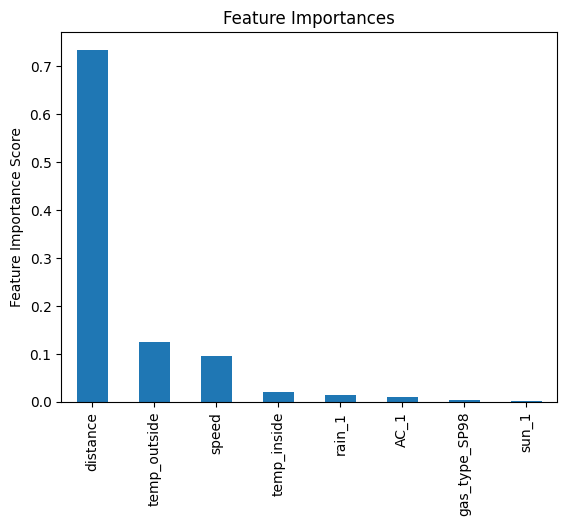

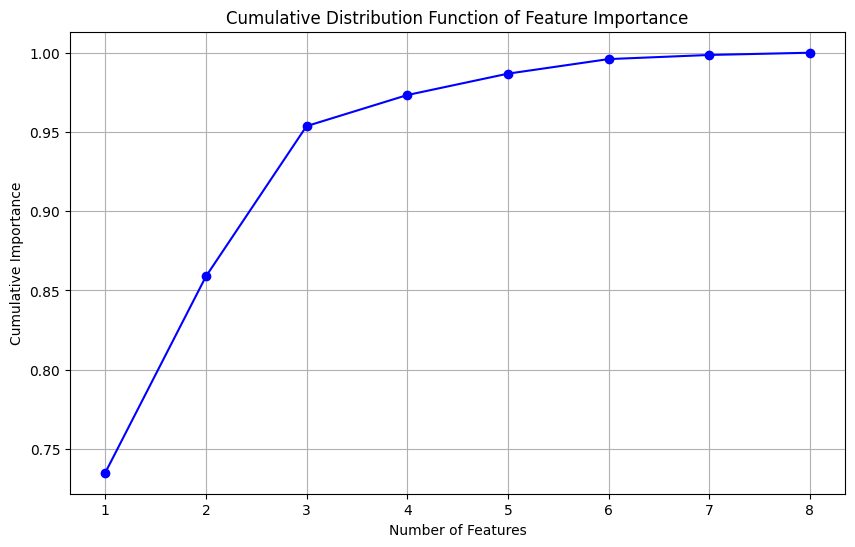

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def modelfit(alg, train, x_train, useTrainCV=True, cv_folds=10, early_stopping_rounds=50):

    # Fit the algorithm on the data
    alg.fit(x_train, y_train)

    # Predict training set
    y_train_pred = alg.predict(x_train)
    y_test_pred = alg.predict(x_test)

    # Print model report
    print("\nModel Report")

    print("Mean Squared Error (MSE train):", mean_squared_error(y_train, y_train_pred))
    print("Mean Squared Error (MSE test):", mean_squared_error(y_test, y_test_pred))

    print("Root Mean Squared Error (RMSE train):", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("Root Mean Squared Error (RMSE test):", np.sqrt(mean_squared_error(y_test, y_test_pred)))

    print("Mean Absolute Error (MAE train):", mean_absolute_error(y_train, y_train_pred))
    print("Mean Absolute Error (MAE test):", mean_absolute_error(y_test, y_test_pred))

    print("R-squared value train:", r2_score(y_train, y_train_pred))
    print("R-squared value test:", r2_score(y_test, y_test_pred))

    feat_imp = pd.Series(alg.feature_importances_, index=x_train.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    print(alg.feature_importances_)

    importances = alg.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]

    # Calculate cumulative importance
    cumulative_importance = np.cumsum(importances[sorted_indices])

    # Find the index where the cumulative importance exceeds the chosen threshold
    threshold_index = np.where(cumulative_importance >= 0.99)[0][0]

    # Select the top features up to the threshold index
    selected_features = sorted_indices[:threshold_index + 1]

    # Print the selected features
    print("Selected features:")
    for idx in selected_features:
      print(f"Feature {idx}: Importance = {importances[idx]}")

    # Plot CDF
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(importances) + 1), cumulative_importance, marker='o', linestyle='-', color='b')
    plt.title('Cumulative Distribution Function of Feature Importance')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.grid(True)
    plt.show()


# Assuming xgb1 is your XGBoost regressor and 'train' is your training dataset
modelfit(rf1, train, x_train) # 'predictors' should be the list of feature columns you are using for prediction


In [ ]:
x_train = train[['distance', 'speed', 'temp_inside', 'temp_outside', 'rain_1']]
y_train = train[['consume']]

x_test = test[['distance', 'speed', 'temp_inside', 'temp_outside', 'rain_1']]
y_test = test[['consume']]

print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      116 non-null    float64
 1   speed         116 non-null    int64  
 2   temp_inside   116 non-null    float64
 3   temp_outside  116 non-null    int64  
 4   rain_1        116 non-null    uint8  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 3.9 KB
None


<ipython-input-37-d91dcc8df313>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  alg.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



Model Report
Mean Squared Error (MSE train): 0.2023831429567519
Mean Squared Error (MSE test): 0.459163817135433
Root Mean Squared Error (RMSE train): 0.4498701401035102
Root Mean Squared Error (RMSE test): 0.6776162757309132
Mean Absolute Error (MAE train): 0.29863308719466797
Mean Absolute Error (MAE test): 0.41093107646663685
R-squared value train: 0.8383590884991279
R-squared value test: 0.2508538056388212
[0.7385039  0.09685769 0.02672486 0.12404674 0.01386681]
Selected features:
Feature 0: Importance = 0.7385038986466467
Feature 3: Importance = 0.12404673533512148
Feature 1: Importance = 0.09685769349174088
Feature 2: Importance = 0.026724859251311073
Feature 4: Importance = 0.01386681327518001


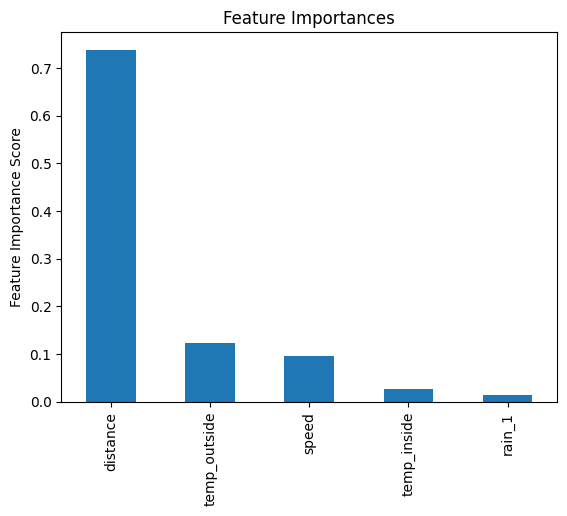

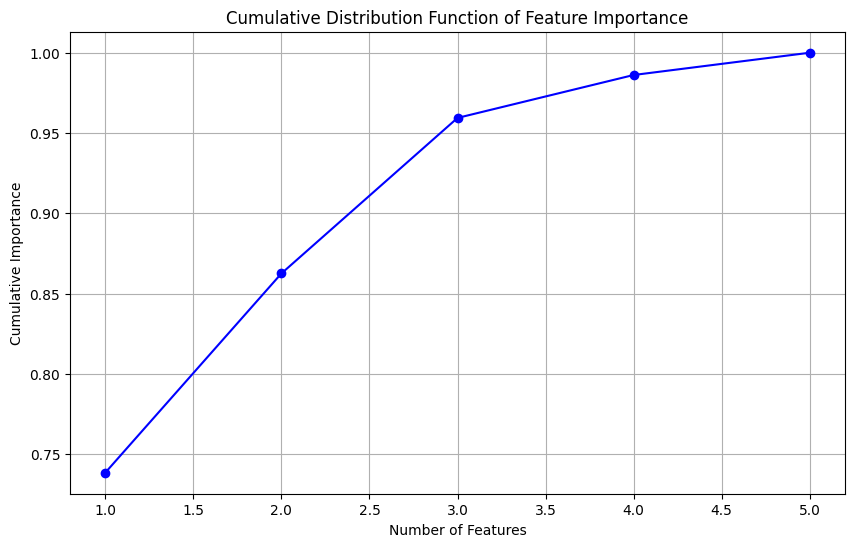

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def modelfit(alg, train, x_train, useTrainCV=True, cv_folds=10, early_stopping_rounds=50):

    # Fit the algorithm on the data
    alg.fit(x_train, y_train)

    # Predict training set
    y_train_pred = alg.predict(x_train)
    y_test_pred = alg.predict(x_test)

    # Print model report
    print("\nModel Report")

    print("Mean Squared Error (MSE train):", mean_squared_error(y_train, y_train_pred))
    print("Mean Squared Error (MSE test):", mean_squared_error(y_test, y_test_pred))

    print("Root Mean Squared Error (RMSE train):", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("Root Mean Squared Error (RMSE test):", np.sqrt(mean_squared_error(y_test, y_test_pred)))

    print("Mean Absolute Error (MAE train):", mean_absolute_error(y_train, y_train_pred))
    print("Mean Absolute Error (MAE test):", mean_absolute_error(y_test, y_test_pred))

    print("R-squared value train:", r2_score(y_train, y_train_pred))
    print("R-squared value test:", r2_score(y_test, y_test_pred))

    feat_imp = pd.Series(alg.feature_importances_, index=x_train.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    print(alg.feature_importances_)

    importances = alg.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]

    # Calculate cumulative importance
    cumulative_importance = np.cumsum(importances[sorted_indices])

    # Find the index where the cumulative importance exceeds the chosen threshold
    threshold_index = np.where(cumulative_importance >= 0.99)[0][0]

    # Select the top features up to the threshold index
    selected_features = sorted_indices[:threshold_index + 1]

    # Print the selected features
    print("Selected features:")
    for idx in selected_features:
      print(f"Feature {idx}: Importance = {importances[idx]}")

    # Plot CDF
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(importances) + 1), cumulative_importance, marker='o', linestyle='-', color='b')
    plt.title('Cumulative Distribution Function of Feature Importance')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.grid(True)
    plt.show()


# Assuming xgb1 is your XGBoost regressor and 'train' is your training dataset
modelfit(rf1, train, x_train) # 'predictors' should be the list of feature columns you are using for prediction


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf1, x_train, y_train, cv=8, scoring='r2')

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWa

Cross-validation Scores: [0.81076866 0.3730143  0.58956153 0.4656493  0.33389794 0.79164019
 0.78640103 0.68505613]
Mean CV Score: 0.6044986345891167
Standard Deviation of CV Scores: 0.1814728855411601


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWa

In [ ]:
#full
Cross-validation Scores: [0.72940576 0.49170405 0.53508159 0.80682034 0.7039692 ]
Mean CV Score: 0.653396186563789
Standard Deviation of CV Scores: 0.12001395300686303

**Multiple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = train[['speed', 'temp_outside', 'temp_inside', 'AC_1', 'rain_1']]
X_test = test[['speed', 'temp_outside', 'temp_inside', 'AC_1', 'rain_1']]


linear_reg1=LinearRegression()
linear_reg1.fit(X_train,y_train)

y_test_pred = linear_reg1.predict(X_test)
y_train_pred = linear_reg1.predict(X_train)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared value
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)


print("Mean Squared Error (MSE train):", mse_train)
print("Mean Squared Error (MSE test):", mse_test)

print("Root Mean Squared Error (RMSE train):", rmse_train)
print("Root Mean Squared Error (RMSE test):", rmse_test)

print("Mean Absolute Error (MAE train):", mae_train)
print("Mean Absolute Error (MAE test):", mae_test)

print("R-squared value train:", r_squared_train)
print("R-squared value test:", r_squared_test)



Mean Squared Error (MSE train): 1.0078546402356456
Mean Squared Error (MSE test): 0.4963236869258835
Root Mean Squared Error (RMSE train): 1.0039196383354823
Root Mean Squared Error (RMSE test): 0.7045024392618406
Mean Absolute Error (MAE train): 0.660941025518094
Mean Absolute Error (MAE test): 0.5607098270201448
R-squared value train: 0.19503897247565516
R-squared value test: 0.19022582495396267


In [ ]:
from sklearn.decomposition import PCA
import numpy as np


# Select the features for PCA
X = train[['speed', 'distance', 'temp_outside', 'temp_inside', 'consume']]

# Standardize the features
X_standardized = (X - X.mean()) / X.std()

# Initialize PCA
pca = PCA(n_components=2)  # Choose the number of principal components

# Fit PCA
pca.fit(X_standardized)

# Transform data to principal components
X_pca = pca.transform(X_standardized)

# Calculate the squared reconstruction error (squared distance from original data)
reconstruction_error = np.square(X_standardized - pca.inverse_transform(X_pca)).sum(axis=1)

# Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(reconstruction_error, 95)

# Identify outliers based on the threshold
outliers = train[reconstruction_error > threshold]

# Display outliers
print(len(outliers))


14


In [ ]:
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox


# Remove outliers identified using PCA
cleaned_df = train[reconstruction_error <= threshold]

# Fit a linear regression model to the cleaned dataset
X_cleaned = cleaned_df[['speed', 'temp_inside', 'temp_outside', 'AC_1', 'rain_1',]]
y_cleaned = cleaned_df[['consume']]

x_test=test[['speed', 'temp_inside', 'temp_outside', 'AC_1', 'rain_1',]]

y_train_transformed, lambda_value1 = boxcox(y_cleaned['consume'])
y_test_transformed, lambda_value2 = boxcox(y_test['consume'])

linear_reg1=LinearRegression()
linear_reg1.fit(X_cleaned,y_train_transformed)

y_test_pred_transformed = linear_reg1.predict(x_test)
y_train_pred_transformed = linear_reg1.predict(X_cleaned)

# Calculate residuals
train_residuals_transformed = y_train_transformed - y_train_pred_transformed
test_residuals_transformed = y_test_transformed - y_test_pred_transformed



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train_transformed, y_train_pred_transformed)
mse_test = mean_squared_error(y_test_transformed, y_test_pred_transformed)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train_transformed, y_train_pred_transformed)
mae_test = mean_absolute_error(y_test_transformed, y_test_pred_transformed)

# Calculate R-squared value
r_squared_train = r2_score(y_train_transformed, y_train_pred_transformed)
r_squared_test = r2_score(y_test_transformed, y_test_pred_transformed)


print("Mean Squared Error (MSE train):", mse_train)
print("Mean Squared Error (MSE test):", mse_test)

print("Root Mean Squared Error (RMSE train):", rmse_train)
print("Root Mean Squared Error (RMSE test):", rmse_test)

print("Mean Absolute Error (MAE train):", mae_train)
print("Mean Absolute Error (MAE test):", mae_test)

print("R-squared value train:", r_squared_train)
print("R-squared value test:", r_squared_test)



Mean Squared Error (MSE train): 0.0002542406109994589
Mean Squared Error (MSE test): 0.0009874582708054452
Root Mean Squared Error (RMSE train): 0.015944924302092465
Root Mean Squared Error (RMSE test): 0.03142384875863307
Mean Absolute Error (MAE train): 0.012545185345457826
Mean Absolute Error (MAE test): 0.02660930247775217
R-squared value train: 0.22026581609831164
R-squared value test: -1.3325162038627645
